In [1]:
from google.colab import files
uploaded = files.upload()

Saving Brest Cancer Dataset.zip to Brest Cancer Dataset.zip


In [2]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "Brest Cancer Dataset.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 
    zip.close()

File Name                                             Modified             Size
Brest Cancer Dataset.csv                       2019-07-09 23:53:20       125141
Extracting all the files now...
Done!


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(5,5))
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from datetime import datetime as dt

#-----------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#----------------------------------------------------

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
#----------------------------------------------------

import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
#----------------------------------------------------

<Figure size 360x360 with 0 Axes>

In [4]:
df = pd.read_csv('Brest Cancer Dataset.csv')
df.shape

(569, 32)

In [5]:
df.head(5)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [6]:
df.drop(['id'], axis = 1, inplace = True)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [7]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
# 1 
concavity_mean = 1
for i in df['concavity_mean']:
  if i == 0:
    concavity_mean += 1
print(concavity_mean)

# 2 
concave_points_mean = 1
for i in df['concave points_mean']:
  if i == 0:
    concave_points_mean += 1
print(concave_points_mean)

# 2
symmetry_mean = 1
for i in df['symmetry_mean']:
  if i == 0:
    symmetry_mean += 1
print(symmetry_mean)

#only 14 zeros out of 569 data points is considerable

14
14
1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
symmetry_se                569 

In [10]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [11]:
#Encoding Male and Female to 1 and 0
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})
df['diagnosis'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [12]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, 30].values

print("X: {}".format(X.shape))
print("Y: {}".format(Y.shape))

X: (569, 30)
Y: (569,)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.175,
                                                    random_state = 0)

print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("Y_train: {}".format(Y_train.shape))
print("Y_test: {}".format(Y_test.shape))

X_train: (469, 30)
X_test: (100, 30)
Y_train: (469,)
Y_test: (100,)


In [14]:
#Building our baseline dummy classifier
from sklearn.dummy import DummyClassifier
clf = DummyClassifier()
clf.fit(X_train, Y_train)

#Predicting Results
y_pred = clf.predict(X_test)

#Calculating Resulta
print("CM: \n",confusion_matrix(Y_test, y_pred))
print("acc: {0}%".format(accuracy_score(Y_test, y_pred) * 100))

CM: 
 [[19 22]
 [17 42]]
acc: 61.0%


## Logistic Regression Classifier

In [15]:
st=dt.now()
logits = LogisticRegression(solver = 'liblinear')
logits.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

pred_logits = logits.predict(X_test)

#Model Evaluation
logits_acc = accuracy_score(Y_test, pred_logits)
print('Accuracy Score: ' + str(logits_acc))

print('Precision Score: ' + str(precision_score(Y_test, pred_logits)))

print('Recall Score: ' + str(recall_score(Y_test, pred_logits)))

print('F1 Score: ' + str(f1_score(Y_test, pred_logits)))

print('Classification Report: \n' + str(classification_report(Y_test, pred_logits)))

Time taken to complete random search:  0:00:00.019376
Accuracy Score: 0.95
Precision Score: 0.9821428571428571
Recall Score: 0.9322033898305084
F1 Score: 0.9565217391304348
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        41
           1       0.98      0.93      0.96        59

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



## K Nearest Neighbours Classifier

In [16]:
st=dt.now()
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)


knn_pred = knn.predict(X_test)

#Model Evaluation
kacc = accuracy_score(Y_test, knn_pred)
print('Accuracy Score: ' + str(kacc))

print('Precision Score: ' + str(precision_score(Y_test, knn_pred)))

print('Recall Score: ' + str(recall_score(Y_test, knn_pred)))

print('F1 Score: ' + str(f1_score(Y_test, knn_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, knn_pred)))

Time taken to complete random search:  0:00:00.011689
Accuracy Score: 0.94
Precision Score: 0.9491525423728814
Recall Score: 0.9491525423728814
F1 Score: 0.9491525423728814
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        41
           1       0.95      0.95      0.95        59

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



## Liner Support Vector Classifier

In [17]:
st=dt.now()
l_svc = SVC(kernel = 'linear')
l_svc.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

l_pred = l_svc.predict(X_test)

#Model Evaluation
lsvcacc = accuracy_score(Y_test, l_pred)
print('Accuracy Score: ' + str(lsvcacc))

print('Precision Score: ' + str(precision_score(Y_test, l_pred)))

print('Recall Score: ' + str(recall_score(Y_test, l_pred)))

print('F1 Score: ' + str(f1_score(Y_test, l_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, l_pred)))

Time taken to complete random search:  0:00:02.474460
Accuracy Score: 0.95
Precision Score: 0.9821428571428571
Recall Score: 0.9322033898305084
F1 Score: 0.9565217391304348
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        41
           1       0.98      0.93      0.96        59

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



##Kernel SVM

In [18]:
st=dt.now()
gk_svc = SVC(kernel = 'rbf')
gk_svc.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

gk_pred = gk_svc.predict(X_test)

#Model Evaluation
ksvcaccacc = accuracy_score(Y_test, gk_pred)
print('Accuracy Score: ' + str(ksvcaccacc))

print('Precision Score: ' + str(precision_score(Y_test, gk_pred)))

print('Recall Score: ' + str(recall_score(Y_test, gk_pred)))

print('F1 Score: ' + str(f1_score(Y_test, gk_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, gk_pred)))

Time taken to complete random search:  0:00:00.033044
Accuracy Score: 0.59
Precision Score: 0.59
Recall Score: 1.0
F1 Score: 0.7421383647798743
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.59      1.00      0.74        59

    accuracy                           0.59       100
   macro avg       0.29      0.50      0.37       100
weighted avg       0.35      0.59      0.44       100



## Random Forest Classifierst


In [19]:
st=dt.now()
randomforest = RandomForestClassifier(n_estimators = 100, 
                                      random_state = 0)
randomforest.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

random_pred = randomforest.predict(X_test)

#Model Evaluation
rmacc = accuracy_score(Y_test, random_pred)
print('Accuracy Score: ' + str(rmacc))

print('Precision Score: ' + str(precision_score(Y_test, random_pred)))

print('Recall Score: ' + str(recall_score(Y_test, random_pred)))

print('F1 Score: ' + str(f1_score(Y_test, random_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, random_pred)))

Time taken to complete random search:  0:00:00.167032
Accuracy Score: 0.96
Precision Score: 0.9661016949152542
Recall Score: 0.9661016949152542
F1 Score: 0.9661016949152542
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        41
           1       0.97      0.97      0.97        59

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



## Decision Tree Classifier

In [20]:
st=dt.now()
decison = DecisionTreeClassifier(criterion = 'entropy', 
                                 random_state = 0)
decison.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

decison_pred = decison.predict(X_test)

#Model Evaluation
dtacc = accuracy_score(Y_test, decison_pred)
print('Accuracy Score: ' + str(dtacc))

print('Precision Score: ' + str(precision_score(Y_test, decison_pred)))

print('Recall Score: ' + str(recall_score(Y_test, decison_pred)))

print('F1 Score: ' + str(f1_score(Y_test, decison_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, decison_pred)))

Time taken to complete random search:  0:00:00.014401
Accuracy Score: 0.9
Precision Score: 0.9454545454545454
Recall Score: 0.8813559322033898
F1 Score: 0.9122807017543859
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        41
           1       0.95      0.88      0.91        59

    accuracy                           0.90       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



##BernoulliNB Classifier

In [21]:
st=dt.now()
bernb = BernoulliNB()
bernb.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

bernb_predict = bernb.predict(X_test)

#Model Evaluation
bncacc = accuracy_score(Y_test, bernb_predict)
print('Accuracy Score: ' + str(bncacc))

print('Precision Score: ' + str(precision_score(Y_test, bernb_predict)))

print('Recall Score: ' + str(recall_score(Y_test, bernb_predict)))

print('F1 Score: ' + str(f1_score(Y_test, bernb_predict)))

print('Classification Report: \n' + str(classification_report(Y_test, bernb_predict)))

Time taken to complete random search:  0:00:00.003578
Accuracy Score: 0.59
Precision Score: 0.59
Recall Score: 1.0
F1 Score: 0.7421383647798743
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.59      1.00      0.74        59

    accuracy                           0.59       100
   macro avg       0.29      0.50      0.37       100
weighted avg       0.35      0.59      0.44       100



## MultinomialNB Classifier

In [22]:
st=dt.now()
mulnb = MultinomialNB()
mulnb.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

mulnb_predict = mulnb.predict(X_test)

#Model Evaluation
mulacc = accuracy_score(Y_test, mulnb_predict)
print('Accuracy Score: ' + str(mulacc))

print('Precision Score: ' + str(precision_score(Y_test, mulnb_predict)))

print('Recall Score: ' + str(recall_score(Y_test, mulnb_predict)))

print('F1 Score: ' + str(f1_score(Y_test, mulnb_predict)))

print('Classification Report: \n' + str(classification_report(Y_test, mulnb_predict)))

Time taken to complete random search:  0:00:00.005823
Accuracy Score: 0.9
Precision Score: 0.8656716417910447
Recall Score: 0.9830508474576272
F1 Score: 0.9206349206349207
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.78      0.86        41
           1       0.87      0.98      0.92        59

    accuracy                           0.90       100
   macro avg       0.92      0.88      0.89       100
weighted avg       0.91      0.90      0.90       100



## Artificial Neural Networks

In [38]:
#Building Our Model
# Initialising the ANN
classifier = Sequential()

#Input and 1st Hidden Layer
classifier.add(Dense(units = 20,
                     activation = 'relu',
                     kernel_initializer = 'uniform',
                     input_dim = 30))
classifier.add(Dropout(p = 0.1))


#2nd Hidden Layer
classifier.add(Dense(units = 20,
                     activation = 'relu',
                     kernel_initializer = 'uniform'))
classifier.add(Dropout(p = 0.1))   


#3rd Hidden Layer
classifier.add(Dense(units = 20,
                     activation = 'relu',
                     kernel_initializer = 'uniform'))
classifier.add(Dropout(p = 0.2))               

#Output Layer
classifier.add(Dense(units = 1,
                     activation = 'sigmoid',
                     kernel_initializer = 'uniform'))
               
classifier.compile(optimizer = 'adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy']) 
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_7 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_8 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_9 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 21        
Total para

In [39]:
#training our ANN Model
history = classifier.fit(X_train, 
                         Y_train, 
                         batch_size = 16, 
                         epochs = 500, 
                         validation_split=0.15)

Train on 398 samples, validate on 71 samples
Epoch 1/500
398/398 [==============================] - 1s 2ms/step - loss: 0.6872 - acc: 0.6508 - val_loss: 0.6776 - val_acc: 0.3803
Epoch 2/500
398/398 [==============================] - 0s 130us/step - loss: 0.6627 - acc: 0.5151 - val_loss: 0.6354 - val_acc: 0.4366
Epoch 3/500
398/398 [==============================] - 0s 129us/step - loss: 0.5880 - acc: 0.7588 - val_loss: 0.4816 - val_acc: 0.8873
Epoch 4/500
398/398 [==============================] - 0s 120us/step - loss: 0.4333 - acc: 0.8492 - val_loss: 0.3696 - val_acc: 0.8732
Epoch 5/500
398/398 [==============================] - 0s 133us/step - loss: 0.3063 - acc: 0.8869 - val_loss: 0.4422 - val_acc: 0.8592
Epoch 6/500
398/398 [==============================] - 0s 128us/step - loss: 0.2836 - acc: 0.8920 - val_loss: 0.2697 - val_acc: 0.9014
Epoch 7/500
398/398 [==============================] - 0s 107us/step - loss: 0.2890 - acc: 0.8995 - val_loss: 0.2776 - val_acc: 0.9155
Epoch 8/500


In [40]:
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
ann_pred = classifier.predict(X_test)
ann_pred = (ann_pred > 0.5)

#Model Evaluation
ann = accuracy_score(Y_test, ann_pred)
print('Accuracy Score: ' + str(ann))

print('Precision Score: ' + str(precision_score(Y_test, ann_pred)))

print('Recall Score: ' + str(recall_score(Y_test, ann_pred)))

print('F1 Score: ' + str(f1_score(Y_test, ann_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, ann_pred)))

Accuracy Score: 0.95
Precision Score: 0.95
Recall Score: 0.9661016949152542
F1 Score: 0.957983193277311
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.95      0.97      0.96        59

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



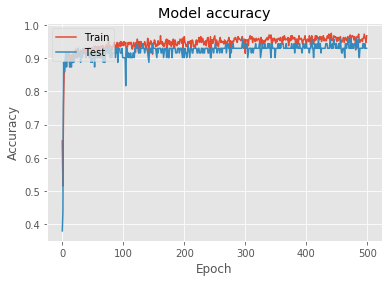

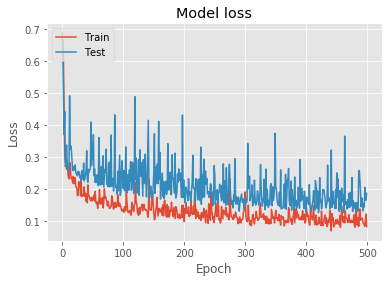

In [41]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [42]:
print('\n                             Accuracy')
print('                            -------------')

print('Logistic Regression        : {:.04} %'.format(logits_acc * 100))
print('KNN Classifier             : {:.04} %'.format(kacc * 100))
print('Linear SVC                 : {:.04} %'.format(lsvcacc * 100))
print('Gaussian Kernel SVC        : {:.04} %'.format(ksvcaccacc * 100))
print('Decision Trees Classifier  : {:.04} %'.format(dtacc * 100))
print('Random Forest Classifier   : {:.04} %'.format(rmacc * 100))
print('BernoulliNB Classifier     : {:.04} %'.format(bncacc * 100))
print('MultinomialNB Classifier   : {:.04} %'.format(mulacc * 100))
print('Artificial Neural Network  : {:.04} %'.format(ann * 100))


                             Accuracy
                            -------------
Logistic Regression        : 95.0 %
KNN Classifier             : 94.0 %
Linear SVC                 : 95.0 %
Gaussian Kernel SVC        : 59.0 %
Decision Trees Classifier  : 90.0 %
Random Forest Classifier   : 96.0 %
BernoulliNB Classifier     : 59.0 %
MultinomialNB Classifier   : 90.0 %
Artificial Neural Network  : 95.0 %


Text(0.5, 1.0, 'Accuracy Comparism')

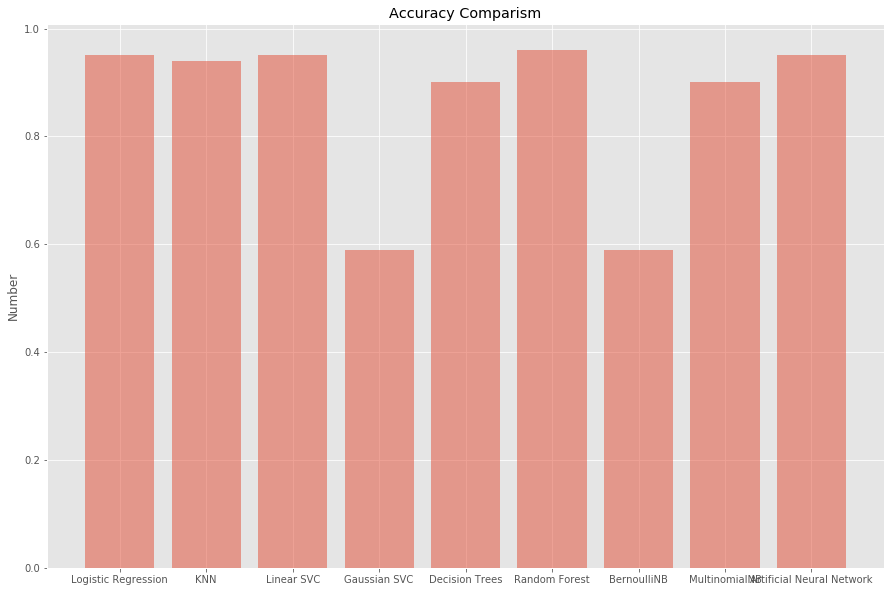

In [43]:
figure = plt.figure(figsize=(15, 10))
# Visualizing the results
objects = ['Logistic Regression',
           'KNN', 
           'Linear SVC', 
           'Gaussian SVC', 
           'Decision Trees', 
           'Random Forest', 
           'BernoulliNB', 
           'MultinomialNB',
           'Artificial Neural Network']
y_pos = np.arange(len(objects))
plt.bar(y_pos,[logits_acc,kacc,lsvcacc,ksvcaccacc,dtacc,rmacc,bncacc,mulacc, ann],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Accuracy Comparism')

## Saving Our Model and the Classifier

In [0]:
#Random Forest Model
import pickle
filename = 'Breast_Cancer.sav'
pickle.dump(randomforest, open(filename, 'wb'))

In [0]:
classifier.save("ANN_rest_Cancer.h5")

In [0]:
""